<a href="https://colab.research.google.com/github/DaVinciAyo/data-science/blob/main/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [ ]:
car= pd.read_csv('/content/cardekho_dataset.csv')

In [ ]:
car.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
car.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


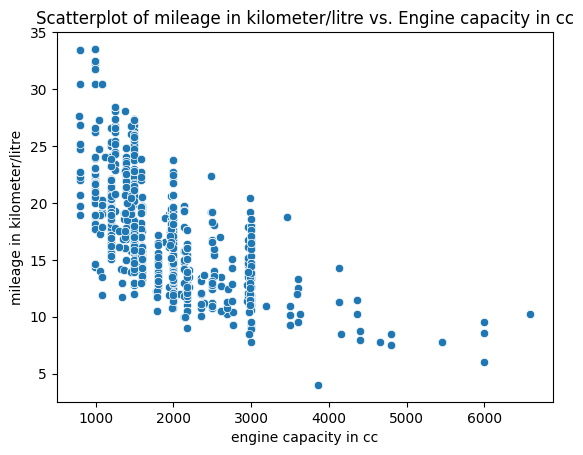

In [ ]:
# Create the scatterplot
sns.scatterplot(x='engine', y='mileage', data=car)

# Add labels and title
plt.xlabel('engine capacity in cc')
plt.ylabel('mileage in kilometer/litre')
plt.title('Scatterplot of mileage in kilometer/litre vs. Engine capacity in cc')

# Display the plot
plt.show()


In [ ]:
# Example:  mileage vs engine
covariance = car['mileage'].cov(car['engine'])
correlation = car['mileage'].corr(car['engine'])

print(f"\nCovariance (mileage vs engine): {covariance:.2f}")
print(f"Correlation (mileage vs engine): {correlation:.2f}")


Covariance (mileage vs engine): -1375.91
Correlation (mileage vs engine): -0.63


In [ ]:

features = car[['selling_price', 'mileage','engine', 'max_power']]

# Handle missing values (if any)
features = features.dropna()

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [ ]:
from sklearn.decomposition import PCA

# Perform PCA and reduce to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Display the principal components
print(principal_df.head())


        PC1       PC2
0 -1.758789 -0.512560
1 -0.575632 -0.307106
2 -0.583576 -0.889299
3 -1.350172 -0.178677
4 -0.434080  0.402604


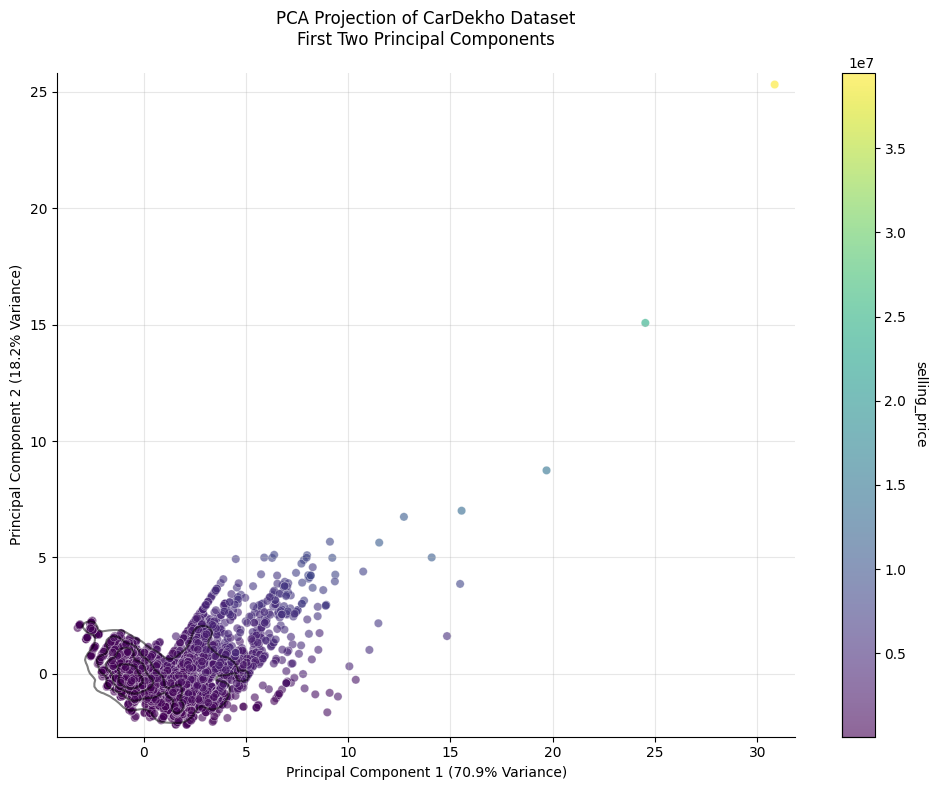

In [ ]:

plt.figure(figsize=(10, 8))

# Create scatter plot with color mapping based on price
scatter = plt.scatter(
    principal_df['PC1'],
    principal_df['PC2'],
    c=car['selling_price'],  # Color by target variable
    cmap='viridis',
    alpha=0.6,
    edgecolor='w',
    linewidth=0.3
)

# Add colorbar and labels
cbar = plt.colorbar(scatter)
cbar.set_label('selling_price', rotation=270, labelpad=15)

# Add annotations for explained variance
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}% Variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}% Variance)')
plt.title('PCA Projection of CarDekho Dataset\nFirst Two Principal Components', pad=20)

# Add grid and styling
plt.grid(alpha=0.3)
sns.despine()
plt.tight_layout()

# Optional: Add density contours
sns.kdeplot(
    x=principal_df['PC1'],
    y=principal_df['PC2'],
    levels=5,
    color='black',
    alpha=0.5
)

plt.show()

In [ ]:
# Get loadings for PC1
loadings = pd.DataFrame({
    'Feature': features.columns, # Changed X.columns to features.columns
    'PC1_Loading': pca.components_[0]
}).sort_values('PC1_Loading', ascending=False)

In [ ]:
loadings

,Feature,PC1_Loading
3,max_power,0.553490
2,engine,0.540345
0,selling_price,0.469725
1,mileage,-0.425481


In [ ]:
# prompt: Using dataframe loadings: showing thier pca loading with differnet color barchat

import altair as alt

# Create the bar chart
alt.Chart(loadings).mark_bar().encode(
    x='Feature',
    y='PC1_Loading',
    color='PC1_Loading'  # Color the bars based on PC1_Loading values
).properties(
    title="PCA Loadings for PC1"
)


alt.Chart(...)